## Imports

In [12]:
from unpickle_all_data import *
import nltk 
import sklearn as sk
import numpy as np
import pickle
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
plt.style.use('seaborn')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\majd2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\majd2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\majd2\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Getting Pickeled Data

In [2]:
X_comments = comments_data['X_comments']
Y_comments = comments_data['Y_comments']

X_comments_sub = comments_data['X_comments_sub']
Y_comments_sub = comments_data['Y_comments_sub']

X_posts = posts_data['X_posts']
Y_posts = posts_data['Y_posts']

X_posts_sub = posts_data['X_posts_sub']
Y_posts_sub = posts_data['Y_posts_sub']


In [14]:
np_Y_comments     = np.array(Y_comments)
np_Y_comments_sub = np.array(Y_comments_sub)
np_Y_posts        = np.array(Y_posts)
np_Y_posts_sub    = np.array(Y_posts_sub)



In [24]:
cooment_normal_count = len(np_Y_comments[np_Y_comments==0])
cooment_bot_count    = len(np_Y_comments[np_Y_comments==1])

comment_sub_normal_count = len(np_Y_comments_sub[np_Y_comments_sub==0])
comment_sub_bot_count    = len(np_Y_comments_sub[np_Y_comments_sub==1])

post_normal_count = len(np_Y_posts[np_Y_posts==0])
post_bot_count    = len(np_Y_posts[np_Y_posts==1])

post_sub_normal_count = len(np_Y_posts_sub[np_Y_posts_sub==0])
post_sub_bot_count    = len(np_Y_posts_sub[np_Y_posts_sub==1])


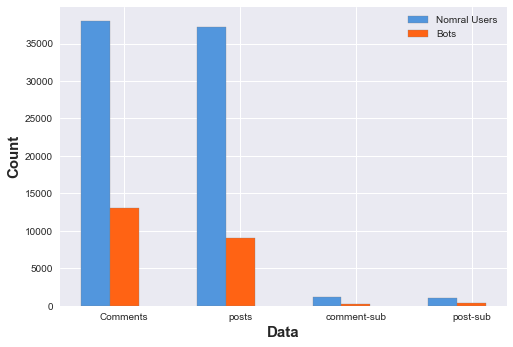

In [38]:
# set width of bar
barWidth = 0.25
# fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
normal = [38000, post_normal_count*0.7, comment_sub_normal_count, post_sub_normal_count]
bot    = [cooment_bot_count,    post_bot_count,    comment_sub_bot_count,    post_sub_bot_count]

 
# Set position of bar on X axis
br1 = np.arange(len(normal))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, normal, color ='#5296dd', width = barWidth,
        edgecolor ='grey', label ='Nomral Users')
plt.bar(br2, bot, color ='#ff6314', width = barWidth,
        edgecolor ='grey', label ='Bots')
 
# Adding Xticks
plt.xlabel('Data', fontweight ='bold', fontsize = 15)
plt.ylabel('Count', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(normal))],
        ['Comments', 'posts', 'comment-sub', 'post-sub'])
 
plt.legend()
plt.show()

## Shuffling Data

In [3]:

def groupData(arr1,arr2):
  return [[arr1[i], arr2[i]] for i in range(len(arr1))]

def ungroupData(arr):
  return [d[0] for d in arr], [d[1] for d in arr]

def shuffleData(arr):
  return sk.utils.shuffle(arr)

comments     = groupData(X_comments,Y_comments)
comments_sub = groupData(X_comments_sub,Y_comments_sub)
posts        = groupData(X_posts,Y_posts)
posts_sub    = groupData(X_posts_sub,Y_posts_sub)

comments     = shuffleData(comments)
comments_sub = shuffleData(comments_sub)
posts        = shuffleData(posts)
posts_sub    = shuffleData(posts_sub)

X_comments    ,Y_comments     = ungroupData(comments)
X_comments_sub,Y_comments_sub = ungroupData(comments_sub)
X_posts       ,Y_posts        = ungroupData(posts)
X_posts_sub   ,Y_posts_sub    = ungroupData(posts_sub)


## Data Preprocessing Helper Functions

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
from nltk.stem import PorterStemmer, SnowballStemmer

def lemmatizing_stemming_data(data, stem = False):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    stemmer = PorterStemmer()
    # snowball_stemmer = SnowballStemmer()
    documents = []
    for i in range(len(data)):
        # Remove all the special characters
        document = re.sub(r'[^a-zA-Z0-9]', ' ', str(data[i]))
        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)
        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)
        # Converting to Lowercase
        document = document.lower() 
        # Lemmatization
        document = document.split()
        if stem:
            document = [stemmer.stem(word) for word in document]
        else:
            document = [lemmatizer.lemmatize(word) for word in document]
        document = ' '.join(document)
  
        documents.append(document)
    return documents

def createVectorizer(training):
  vectorizer = TfidfVectorizer(input='content',max_features=10000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
  vectorizer.fit_transform(training).toarray()
  return vectorizer

def vectorizeData(vectorizer,data):
    return vectorizer.transform(data).toarray()

  

## Preprocessing Data

In [6]:
documents_X_comments_lemmatized     = lemmatizing_stemming_data(X_comments)
documents_X_comments_sub_lemmatized = lemmatizing_stemming_data(X_comments_sub)
documents_X_posts_lemmatized        = lemmatizing_stemming_data(X_posts)
documents_X_posts_sub_lemmatized    = lemmatizing_stemming_data(X_posts_sub)

documents_X_comments_stemed     = lemmatizing_stemming_data(X_comments, stem= True)
documents_X_comments_sub_stemed = lemmatizing_stemming_data(X_comments_sub, stem= True)
documents_X_posts_stemed        = lemmatizing_stemming_data(X_posts, stem= True)
documents_X_posts_sub_stemed    = lemmatizing_stemming_data(X_posts_sub, stem= True)

vectorizer_comments     = createVectorizer(documents_X_comments_lemmatized)
vectorizer_comments_sub = createVectorizer(documents_X_comments_sub_lemmatized)
vectorizer_posts        = createVectorizer(documents_X_posts_lemmatized)
vectorizer_posts_sub    = createVectorizer(documents_X_posts_sub_lemmatized)

weighted_X_comments     = vectorizeData(vectorizer_comments,documents_X_comments_lemmatized)
weighted_X_comments_sub = vectorizeData(vectorizer_comments_sub,documents_X_comments_sub_lemmatized)
weighted_X_posts        = vectorizeData(vectorizer_posts,documents_X_posts_lemmatized)
weighted_X_posts_sub    = vectorizeData(vectorizer_posts_sub,documents_X_posts_sub_lemmatized)

In [7]:
weighted_X_comments     = np.array(weighted_X_comments)
weighted_X_comments_sub = np.array(weighted_X_comments_sub)
weighted_X_posts        = np.array(weighted_X_posts)
weighted_X_posts_sub    = np.array(weighted_X_posts_sub)

In [8]:
print("Number of features:")
print("comments: ", len(vectorizer_comments.vocabulary_.keys()))
print("comments_sub: ",len(vectorizer_comments_sub.vocabulary_.keys()))
print("posts: ",len(vectorizer_posts.vocabulary_.keys()))
print("posts_sub: ",len(vectorizer_posts_sub.vocabulary_.keys()))

Number of features:
comments:  10000
comments_sub:  616
posts:  9382
posts_sub:  731


## Pickling Data

In [9]:
def pickleData(arr, filename):
  with open(filename,'wb') as f: pickle.dump(arr, f)

def unPickleData(filename):
  with open(filename,'rb') as f: arr = pickle.load(f)
  return arr

pickleData(weighted_X_comments,os.path.join("processed_data", "comments","X_comments.pkl"))
pickleData(Y_comments,os.path.join("processed_data", "comments","Y_comments.pkl"))

pickleData(weighted_X_comments_sub,os.path.join("processed_data", "comments","X_comments_sub.pkl"))
pickleData(Y_comments_sub,os.path.join("processed_data", "comments","Y_comments_sub.pkl"))


pickleData(weighted_X_posts,os.path.join("processed_data", "posts","X_posts.pkl"))
pickleData(Y_posts,os.path.join("processed_data", "posts","Y_posts.pkl"))

pickleData(weighted_X_posts_sub,os.path.join("processed_data", "posts","X_posts_sub.pkl"))
pickleData(Y_posts_sub,os.path.join("processed_data", "posts","Y_posts_sub.pkl"))

### Data Sanity Checking

In [10]:
arr = unPickleData(os.path.join("processed_data", "comments","X_comments.pkl"))
print(np.array_equal(arr,weighted_X_comments))

arr = unPickleData(os.path.join("processed_data", "posts","Y_posts.pkl"))
print(np.array_equal(arr,Y_posts))


True
True
